In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import datetime
from scipy.stats import zscore

In [2]:
data=pd.read_csv("C:/Users/Prithvi Shetty/Downloads/Google App Project/Project Final/archive/Google-Playstore.csv")

In [3]:
# Data Dropping 

data.drop([ 'App Id', 'Developer Website','Developer Email','Privacy Policy','Minimum Android'],axis=1, inplace=True)

In [4]:
data["Released"].fillna(value="Oct 13, 2020", inplace=True)


In [5]:
data["Released"]= pd.to_datetime(data['Released'], format='%b %d, %Y',
                                 infer_datetime_format=True, errors='coerce')
data["Last Updated"]= pd.to_datetime(data['Last Updated'], format='%b %d, %Y',
                                 infer_datetime_format=True, errors='coerce')

In [6]:
data["Last Updated"]= pd.to_datetime(data['Last Updated'], format='%b %d, %Y',
                                 infer_datetime_format=True, errors='coerce')

In [7]:
data['Size']= pd.to_numeric(data['Size'].str.replace(r'[a-zA-Z]+', ''), 
                             errors='coerce')

In [8]:
data['Tenurity']= (datetime.datetime(2021, 1, 31) - data['Released']).dt.days
data['Maintaninance']= (datetime.datetime(2021, 1, 31) - data['Last Updated']).dt.days

In [9]:
data["Installs"]=data["Installs"].str.replace("+","")
data["Installs"]=data["Installs"].str.replace(",","")
data["Installs"]= pd.to_numeric(data["Installs"].astype(float))

In [10]:
data.drop(['Price'], inplace=True, axis =1)

In [11]:
data['App Name'].fillna(value="Tic Tac Toe",inplace=True)
data["Rating"].fillna(data['Rating'].mean(), inplace=True)
data["Rating Count"].fillna(data['Rating Count'].median(), inplace=True)
data["Minimum Installs"].fillna(data['Minimum Installs'].median(), inplace=True)
data["Installs"].fillna(data['Installs'].median(), inplace=True)
data["Currency"].fillna(value="USD", inplace= True)
data["Category"].fillna(value="Education", inplace= True)
data["Size"].fillna(data["Size"].median(), inplace= True)
#data["App Name"].fillna(value="Tic Tac Toe",inplace= True)
data["Developer Id"].fillna(value="Subsplash Inc",inplace=True)
#data["Developer Website"].fillna(value="http://www.subsplash.com/", inplace=True)
#data["Developer Email"].fillna(value="support@classplus.co", inplace=True)
data["Released"].fillna(value="Oct 13, 2020", inplace=True)
#data["Privacy Policy"].fillna(value="http://www.cmcm.com/protocol/launcher-theme/privacy.html", inplace=True)
#data["Developer Website"].fillna(value="http://www.subsplash.com/", inplace=True)

In [12]:
data.drop(['Minimum Installs'], inplace=True, axis=1)

In [13]:
data.drop([ 'Last Updated', 'Released'],axis=1, inplace=True)

In [14]:
def find_boundrs(data,variable):
    q1 = data[variable].quantile(.25)
    q3 = data[variable].quantile(.75)
    iqr = q3-q1
    lowr_bondry = q1 - 1.5 * iqr
    upr_bondry = q3 + 1.5 * iqr
    
    return lowr_bondry , upr_bondry



In [15]:
lowr_rating , upr_rating = find_boundrs(data,'Rating Count')
print('Lower Limit : ',lowr_rating)
print('Upper Limit : ',upr_rating)


data['Rating Count'] = np.where(data['Rating Count'] > upr_rating,upr_rating, 
                           np.where(data['Rating Count'] < lowr_rating, lowr_rating, data['Rating Count']))

Lower Limit :  -148.5
Upper Limit :  247.5


In [16]:
lowr_rating , upr_rating = find_boundrs(data,'Rating')
print('Lower Limit : ',lowr_rating)
print('Upper Limit : ',upr_rating)
data['Rating'] = np.where(data['Rating'] > upr_rating,upr_rating, 
                           np.where(data['Rating'] < lowr_rating, lowr_rating, data['Rating']))

Lower Limit :  -6.449999999999999
Upper Limit :  10.75


In [17]:
lowr_rating , upr_rating = find_boundrs(data,'Installs')
print('Lower Limit : ',lowr_rating)
print('Upper Limit : ',upr_rating)
data['Installs'] = np.where(data['Installs'] > upr_rating,upr_rating, 
                           np.where(data['Installs'] < lowr_rating, lowr_rating, data['Installs']))

Lower Limit :  -14750.0
Upper Limit :  24850.0


In [18]:
lowr_rating , upr_rating = find_boundrs(data,'Maximum Installs')
print('Lower Limit : ',lowr_rating)
print('Upper Limit : ',upr_rating)
data['Maximum Installs'] = np.where(data['Maximum Installs'] > upr_rating,upr_rating, 
                           np.where(data['Maximum Installs'] < lowr_rating, lowr_rating, data['Maximum Installs']))

Lower Limit :  -28274.0
Upper Limit :  47550.0


In [19]:
lowr_rating , upr_rating = find_boundrs(data,'Size')
print('Lower Limit : ',lowr_rating)
print('Upper Limit : ',upr_rating)
data['Size'] = np.where(data['Size'] > upr_rating,upr_rating, 
                           np.where(data['Size'] < lowr_rating, lowr_rating, data['Size']))

Lower Limit :  -23.25
Upper Limit :  52.349999999999994


In [20]:
lowr_rating , upr_rating = find_boundrs(data,'Tenurity')
print('Lower Limit : ',lowr_rating)
print('Upper Limit : ',upr_rating)
data['Tenurity'] = np.where(data['Tenurity'] > upr_rating,upr_rating, 
                           np.where(data['Tenurity'] < lowr_rating, lowr_rating, data['Tenurity']))

Lower Limit :  -1236.5
Upper Limit :  3039.5


In [21]:
lowr_rating , upr_rating = find_boundrs(data,'Maintaninance')
print('Lower Limit : ',lowr_rating)
print('Upper Limit : ',upr_rating)
data['Maintaninance'] = np.where(data['Maintaninance'] > upr_rating,upr_rating, 
                           np.where(data['Maintaninance'] < lowr_rating, lowr_rating, data['Maintaninance']))

Lower Limit :  -735.5
Upper Limit :  1604.5


In [22]:
data['Category'].value_counts()

Education                  115245
Music & Audio              104541
Entertainment               82079
Books & Reference           78969
Personalization             73538
Tools                       68953
Lifestyle                   54586
Business                    42210
Health & Fitness            31532
Productivity                30450
Photography                 28942
Travel & Local              25971
Puzzle                      24954
Finance                     24846
Food & Drink                24250
Sports                      22094
News & Magazines            21553
Casual                      20509
Shopping                    20440
Communication               18391
Arcade                      17715
Social                      16987
Simulation                  15372
Action                      12628
Medical                     12554
Art & Design                12322
Educational                 11351
Maps & Navigation           10468
Adventure                   10124
Video Players 

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


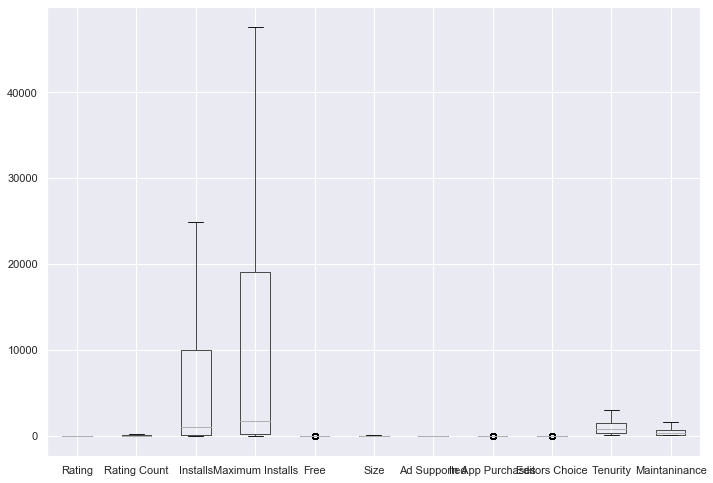

In [24]:
data.boxplot()

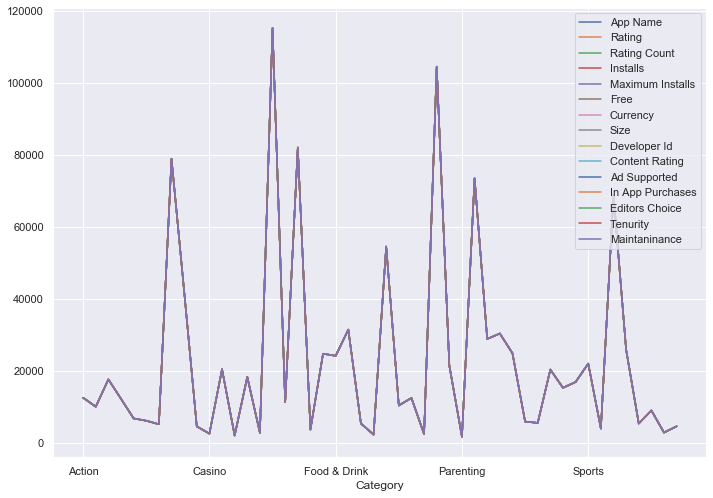

In [25]:
data.groupby('Category').count().plot()

In [120]:
pd.crosstab(data['Free'], data["Ad Supported"].sort_values(ascending=False))


Ad Supported,False,True
Free,,
False,43716,3087
True,348604,722729


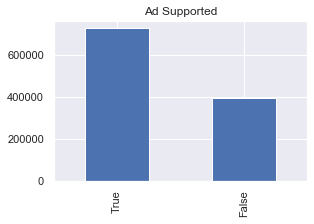

In [117]:
fig = plt.figure(figsize=(10,10)) 
fig_dims = (3, 2)


# Plot accidents depending on type

data["Ad Supported"].value_counts().plot(kind='bar', 
                                     title="Ad Supported")

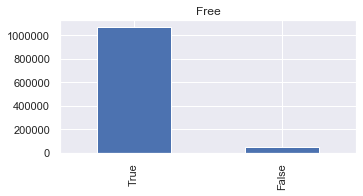

In [119]:
plt.subplot2grid(fig_dims, (0, 0))
data['Free'].value_counts().plot(kind='bar', 
                                     title='Free')


In [99]:
data['Size'].groupby('Ad Supported').count().plot()

KeyError: 'Ad Supported'

In [ ]:
data.skew().sort_values(ascending=True)

In [ ]:
data.describe()

In [ ]:
data.drop(['Developer Id'], inplace=True, axis=1)

In [ ]:
data.head(10)

In [27]:
data.drop(['App Name'], inplace=True, axis=1)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split


In [29]:
y = data['Ad Supported']
x = data.drop('Ad Supported', axis=1)

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=1)


In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

for column in data.columns:
    if data[column].dtype == type(object):
        data[column] = label_encoder.fit_transform(data[column])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
y_pred

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

for column in data.columns:
    if data[column].dtype == type(object):
        data[column] = label_encoder.fit_transform(data[column])

In [32]:
data.drop(['Content Rating'], inplace=True, axis=1)

In [33]:
data.head()

,Category,Rating,Rating Count,Installs,Maximum Installs,Free,Currency,Size,Developer Id,Ad Supported,In App Purchases,Editors Choice,Tenurity,Maintaninance
0,13,3.6,247.5,24850.0,47550.0,True,50,2.70,145615,False,False,False,2729.0,1352.0
1,41,4.3,247.5,24850.0,47550.0,True,50,52.35,119922,True,True,False,927.0,66.0
2,42,4.2,247.5,24850.0,47550.0,True,50,5.80,132141,True,False,False,1791.0,102.0
3,8,4.2,247.5,24850.0,47550.0,True,50,52.35,86333,True,True,False,3039.5,69.0
4,28,4.2,247.5,24850.0,47550.0,True,50,29.00,13241,False,False,False,1590.0,70.0


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

In [ ]:
x.info()

In [35]:
y = data['Ad Supported']
x = data.drop('Ad Supported', axis=1)

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=1)
logmodel=LogisticRegression()
logmodel.fit(x_train, y_train)

C:\Users\Prithvi Shetty\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
predictions = logmodel.predict(x_test)

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
classification_report(y_test,predictions)

In [44]:
confusion_matrix(y_test,predictions)

array([[ 14944,  63101],
       [  9402, 136181]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score, f1_score

In [46]:
accuracy_score(y_test,predictions)

0.6757874684744307

In [51]:
f1_score(predictions , y_test)

0.7897641105940005

In [47]:
x.head(20)

,Category,Rating,Rating Count,Installs,Maximum Installs,Free,Currency,Size,Developer Id,In App Purchases,Editors Choice,Tenurity,Maintaninance
0,13,3.6,247.5,24850.0,47550.0,True,50,2.70,145615,False,False,2729.0,1352.0
1,41,4.3,247.5,24850.0,47550.0,True,50,52.35,119922,True,False,927.0,66.0
2,42,4.2,247.5,24850.0,47550.0,True,50,5.80,132141,False,False,1791.0,102.0
3,8,4.2,247.5,24850.0,47550.0,True,50,52.35,86333,True,False,3039.5,69.0
4,28,4.2,247.5,24850.0,47550.0,True,50,29.00,13241,False,False,1590.0,70.0
5,25,3.5,247.5,10000.0,38029.0,True,50,12.00,155458,False,False,727.0,86.0
6,24,4.4,247.5,24850.0,47550.0,True,50,9.40,68137,True,False,1117.0,489.0
7,16,4.0,247.5,24850.0,47550.0,True,50,52.35,16481,True,False,899.0,124.0
8,16,4.1,247.5,24850.0,47550.0,True,50,52.35,16481,True,False,279.0,124.0
9,42,3.3,247.5,24850.0,47550.0,True,50,3.30,122834,False,False,384.0,220.0


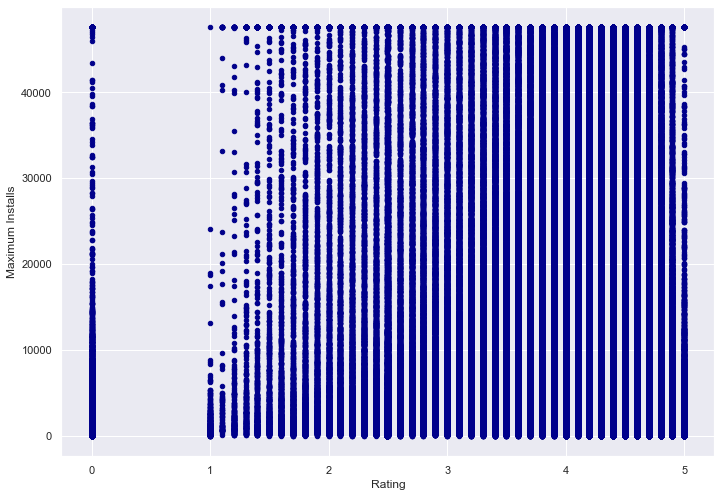

In [94]:
data.plot.scatter(x='Rating',
                      y='Maximum Installs',
                      c='DarkBlue')

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf = RandomForestClassifier()

In [84]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
y_pred = rf.predict(x_test)

In [86]:
y_pred

array([ True,  True, False, ...,  True,  True,  True])

In [87]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [88]:
accuracy_score(y_pred , y_test)

0.8390943888958449

In [89]:
confusion_matrix(y_pred , y_test)

array([[ 53648,  11586],
       [ 24397, 133997]], dtype=int64)

In [90]:
f1_score(y_pred , y_test)

0.8816259124868

In [91]:
pd.DataFrame(y_pred,y_test).tail(15)

,0
Ad Supported,
True,True
False,False
True,True
False,True
True,True
False,False
False,False
True,True
False,False
